In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
register_matplotlib_converters()
import statsmodels.api as sm

## Yerli

In [3]:
df = pd.read_csv("D:/BTP/Gopalkheda and yerli/ACF,PACF and MI/acf yerli.csv")
df

,year,months,Day,Discharge,RF1,RF2,RF3,RF4,RF5,RF6,...,RF119,RF120,RF121,RF122,RF123,RF124,RF125,RF126,RF127,Lumped rainfall yerli
0,1973,6,1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283190
1,1973,6,2,0.2,0.3,0.0,0.6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018502
2,1973,6,3,0.2,0.0,0.2,0.0,0.0,0.0,0.0,...,0.0,0.5,7.3,9.7,5.5,5.8,2.7,0.6,1.0,1.291675
3,1973,6,4,0.2,2.7,2.4,5.2,6.4,0.6,0.0,...,0.0,0.4,0.0,0.0,8.5,0.0,0.0,0.0,0.0,1.771333
4,1973,6,5,0.2,7.4,37.4,51.5,2.2,5.7,37.2,...,0.0,0.0,0.0,0.0,10.2,0.0,0.0,0.0,0.0,7.110623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2021,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073053
17528,2021,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2.9,0.0,0.0,0.820913
17529,2021,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.307082
17530,2021,5,30,0.0,5.9,0.0,0.1,0.3,5.2,11.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.300925


Text(0, 0.5, 'Correlation')

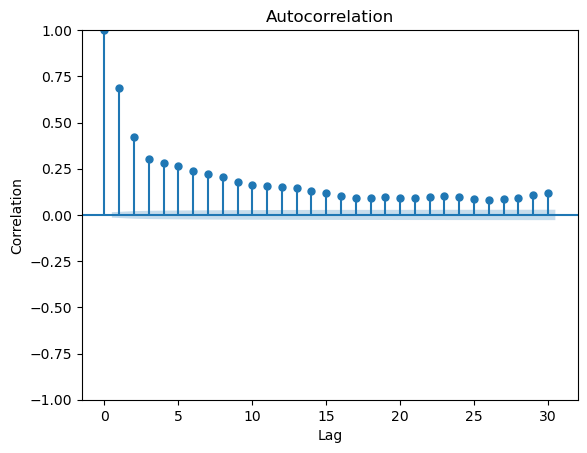

In [14]:
# acf = plot_acf(df.Discharge, lags = 30,xlabel="Lag")
sm.graphics.tsa.plot_acf(df['Discharge'].values.squeeze(), lags=30)
plt.xlabel('Lag')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

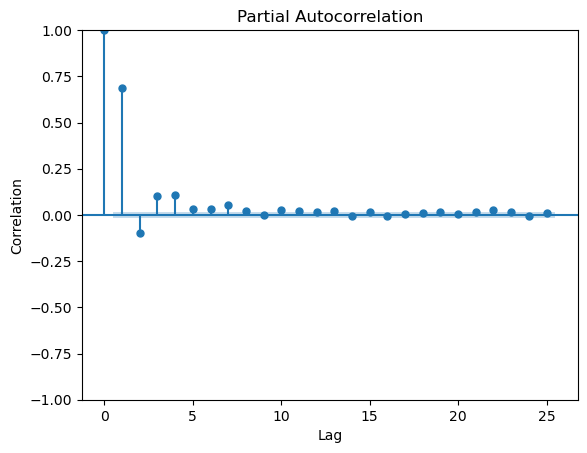

In [17]:
# pacf = plot_pacf(df.Discharge, lags = 20)
sm.graphics.tsa.plot_pacf(df['Discharge'].values.squeeze(), lags=25)
plt.xlabel('Lag')
plt.ylabel('Correlation')

In [18]:
from sklearn.feature_selection import mutual_info_regression

X = df.copy()
X.pop("months")
X.pop("year")
X.pop("Day")
y = X.pop("Discharge")

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
# res = pd.DataFrame(mi_scores).T
# res.to_excel('mutual information.xlsx')

## Gopalkheda